In [1]:
import logging

import matplotlib.pyplot as plt

from ev_station_solver.loading import load_locations
from ev_station_solver.logging import get_logger
from ev_station_solver.solving.solver import Solver

logger = get_logger(__name__)

# Initial Location Generator

In [2]:
# use given starting solutions
locations = load_locations("medium").values
num_samples = 5

## Cliques

In [3]:
s = Solver(vehicle_locations=locations, loglevel=logging.INFO)
s.add_samples(num=num_samples)
s.add_initial_locations(n_stations=None, mode="clique", seed=0)

2025-01-20 13:20:27,564 - ev_station_solver.solving.solver - INFO - add_samples: Added 5 samples.
2025-01-20 13:20:27,564 - ev_station_solver.solving.initial_location_generator - INFO - get_clique_locations: Computing clique locations
2025-01-20 13:20:31,243 - ev_station_solver.solving.initial_location_generator - INFO - get_clique_locations: Finished computing clique locations
2025-01-20 13:20:31,243 - ev_station_solver.solving.solver - INFO - add_initial_locations: Added 63 clique locations. Total number of locations: 63.


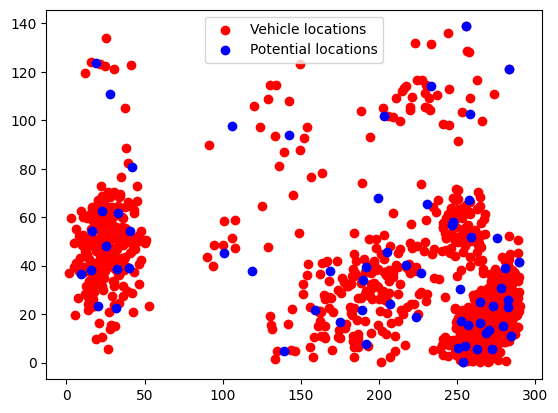

In [4]:
plt.scatter(s.vehicle_locations[:, 0], s.vehicle_locations[:, 1], c="red", label="Vehicle locations")
plt.scatter(s.coordinates_potential_cl[:, 0], s.coordinates_potential_cl[:, 1], c="blue", label="Potential locations")
plt.legend()
plt.show()

In [5]:
# obtain number of potential charging stations
n_stations = len(s.coordinates_potential_cl)
logger.info(f"Number of potential charging stations: {n_stations}")

2025-01-20 13:20:31,366 - __main__ - INFO - <module>: Number of potential charging stations: 63


## K Means

In [6]:
# current approach with k means
s = Solver(vehicle_locations=locations, loglevel=logging.INFO)

# compute number of initial locations
s.add_initial_locations(n_stations, mode="k-means", seed=0)
s.add_samples(num=num_samples)

2025-01-20 13:20:31,427 - ev_station_solver.solving.solver - INFO - add_initial_locations: Added 63 k-means locations. Total number of locations: 63.
2025-01-20 13:20:31,432 - ev_station_solver.solving.solver - INFO - add_samples: Added 5 samples.


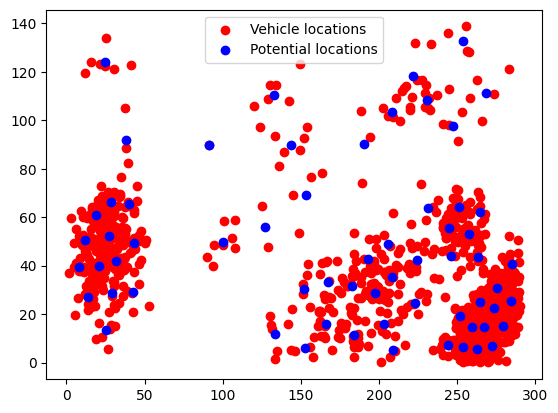

In [7]:
plt.scatter(s.vehicle_locations[:, 0], s.vehicle_locations[:, 1], c="red", label="Vehicle locations")
plt.scatter(s.coordinates_potential_cl[:, 0], s.coordinates_potential_cl[:, 1], c="blue", label="Potential locations")
plt.legend()
plt.show()

## Random

In [8]:
# current approach with k means
s = Solver(vehicle_locations=locations, loglevel=logging.INFO)

# compute number of initial locations
s.add_initial_locations(n_stations, mode="random", seed=0)
s.add_samples(num=num_samples)

2025-01-20 13:20:31,562 - ev_station_solver.solving.solver - INFO - add_initial_locations: Added 63 random locations. Total number of locations: 63.
2025-01-20 13:20:31,567 - ev_station_solver.solving.solver - INFO - add_samples: Added 5 samples.


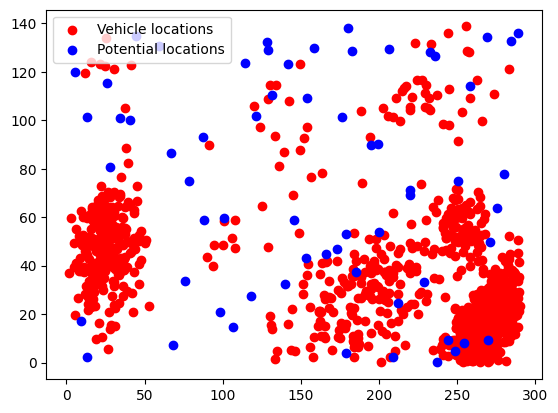

In [9]:
plt.scatter(s.vehicle_locations[:, 0], s.vehicle_locations[:, 1], c="red", label="Vehicle locations")
plt.scatter(s.coordinates_potential_cl[:, 0], s.coordinates_potential_cl[:, 1], c="blue", label="Potential locations")
plt.legend()
plt.show()